In [37]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

In [38]:
from astropy.io import fits
import pandas as pd

isFermi = True
normalize = True

# Open the FITS file
if isFermi :
    file_path = "/pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/fermi-gbm.fits"  # Replace with your file path
else :
    file_path = "/pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/batse.fits"  # Replace with your file path

with fits.open(file_path) as hdul:
    hdul.info()  # Display information about the HDUs (Header Data Units)
    
    # Assume the data is in the first table HDU
    data = hdul[1].data

    # Convert to a Pandas DataFrame
    df = pd.DataFrame(data.tolist(), columns=data.names)

# Preview the DataFrame
print(df.head())


Filename: /pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/fermi-gbm.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FERMIGBRST    1 TableHDU       205   3875R x 33C   [A30, F8.4, F8.4, F15.7, F8.3, F6.3, F8.3, D10.4, D10.4, F9.4, F8.4, F8.3, F9.4, F9.4, D12.6, F7.4, F8.3, F6.3, F8.3, D12.6, D12.6, D13.6, D12.6, D12.6, D12.6, D12.6, D12.6, D12.6, D12.6, D12.6, D13.6, D13.6, D12.6]   
                             NAME        RA      DEC  TRIGGER_TIME     T90  \
0  GRB120403857                     55.3384 -89.0093  56020.856927   4.288   
1  GRB120227725                    256.7300 -88.8600  55984.725475  17.408   
2  GRB230524357                     13.0800 -87.7700  60088.357309  11.008   
3  GRB231031144                    155.2200 -77.5100  60248.143988  11.520   
4  GRB240421224                    291.8300 -77.3600  60421.223610   4.096   

   T90_ERROR  T90_START       FLUENCE  FLUENCE_ERROR 

In [39]:
df

,NAME,RA,DEC,TRIGGER_TIME,T90,T90_ERROR,T90_START,FLUENCE,FLUENCE_ERROR,FLUX_1024,...,PFLX_PLAW_INDEX_NEG_ERR,PFLX_PLAW_PHTFLUX,PFLX_PLAW_PHTFLNC,PFLX_PLAW_ERGFLUX,PFLX_COMP_EPEAK,PFLX_COMP_PIVOT,PFLX_BAND_EPEAK,PFLX_BAND_ALPHA,PFLX_BAND_BETA,PFLX_BAND_PHTFLUX
0,GRB120403857,55.3384,-89.0093,56020.856927,4.288,1.935,-3.968,2.396400e-07,2.045800e-08,1.7469,...,0.072564,2.004649,2.045939,3.451636e-07,205.7393,100.0,202.53480,-0.521362,-2.802798,1.837350
1,GRB120227725,256.7300,-88.8600,55984.725475,17.408,0.810,0.256,2.194900e-05,1.040300e-07,18.4653,...,0.022620,23.012680,23.446380,2.615053e-06,204.6519,100.0,123.06730,-0.339711,-2.277248,17.925290
2,GRB230524357,13.0800,-87.7700,60088.357309,11.008,4.720,-5.632,1.420100e-06,4.245700e-08,3.5503,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
3,GRB231031144,155.2200,-77.5100,60248.143988,11.520,2.573,-1.536,9.104800e-07,2.082500e-08,2.6513,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
4,GRB240421224,291.8300,-77.3600,60421.223610,4.096,1.864,-5.120,5.311400e-06,9.333200e-06,236.7790,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,GRB210624041,119.3200,87.1100,59389.040547,0.304,0.333,-0.032,3.798700e-07,2.017400e-08,3.5822,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
3871,GRB091012783,109.4000,87.2700,55116.782671,0.704,2.499,0.000,2.124100e-06,4.401700e-08,8.3499,...,0.039825,22.930840,1.453232,5.362506e-06,1049.7280,100.0,1051.90800,-0.254330,-12.778120,21.417150
3872,GRB130528695,138.7380,87.2700,56440.695421,55.553,1.864,0.576,1.109300e-05,1.202000e-07,5.6715,...,0.024157,5.688344,5.803018,1.239637e-06,230.3470,100.0,211.48220,0.227613,-2.894047,5.244317
3873,GRB090813174,225.8020,88.5687,55056.174104,7.552,0.362,0.384,3.325400e-06,4.154000e-08,13.6407,...,0.025906,9.539146,9.718811,1.171084e-06,157.2283,100.0,63.36254,-0.160687,-2.031565,8.829557


In [40]:
verbose = False
# df.fillna(-1, inplace=True)

columns_to_drop = []
# print(fdf.columns)
for column in df.columns :
    df[column] = df[column].replace({'~': ''}, regex=True)  # Remove '~' character
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, setting errors to NaN
    found_ratio = df[column].count()/df[column].index.size
    if verbose :
        print(f"Missing values in {column} : {df[column].count()} over {df[column].index.size} for a % of : {found_ratio}")
    if (found_ratio*100 < 75.0) :
        columns_to_drop.append(column)
        print(f"Missing values in {column} : {df[column].count()} over {df[column].index.size} for a % of : {found_ratio}")
        print(f"Dropping column {column} not enough usable data")

fdf = df.drop(columns=columns_to_drop, axis=1)
fdf.dropna(inplace=True)



Missing values in NAME : 0 over 3875 for a % of : 0.0
Dropping column NAME not enough usable data


In [41]:
fdf

,RA,DEC,TRIGGER_TIME,T90,T90_ERROR,T90_START,FLUENCE,FLUENCE_ERROR,FLUX_1024,FLUX_1024_ERROR,...,PFLX_PLAW_INDEX_NEG_ERR,PFLX_PLAW_PHTFLUX,PFLX_PLAW_PHTFLNC,PFLX_PLAW_ERGFLUX,PFLX_COMP_EPEAK,PFLX_COMP_PIVOT,PFLX_BAND_EPEAK,PFLX_BAND_ALPHA,PFLX_BAND_BETA,PFLX_BAND_PHTFLUX
0,55.3384,-89.0093,56020.856927,4.288,1.935,-3.968,2.396400e-07,2.045800e-08,1.7469,0.2388,...,0.072564,2.004649,2.045939,3.451636e-07,205.7393,100.0,202.53480,-0.521362,-2.802798,1.837350
1,256.7300,-88.8600,55984.725475,17.408,0.810,0.256,2.194900e-05,1.040300e-07,18.4653,0.9121,...,0.022620,23.012680,23.446380,2.615053e-06,204.6519,100.0,123.06730,-0.339711,-2.277248,17.925290
2,13.0800,-87.7700,60088.357309,11.008,4.720,-5.632,1.420100e-06,4.245700e-08,3.5503,0.2418,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
3,155.2200,-77.5100,60248.143988,11.520,2.573,-1.536,9.104800e-07,2.082500e-08,2.6513,0.2407,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
4,291.8300,-77.3600,60421.223610,4.096,1.864,-5.120,5.311400e-06,9.333200e-06,236.7790,167.4980,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,119.3200,87.1100,59389.040547,0.304,0.333,-0.032,3.798700e-07,2.017400e-08,3.5822,0.3225,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
3871,109.4000,87.2700,55116.782671,0.704,2.499,0.000,2.124100e-06,4.401700e-08,8.3499,0.3967,...,0.039825,22.930840,1.453232,5.362506e-06,1049.7280,100.0,1051.90800,-0.254330,-12.778120,21.417150
3872,138.7380,87.2700,56440.695421,55.553,1.864,0.576,1.109300e-05,1.202000e-07,5.6715,0.2736,...,0.024157,5.688344,5.803018,1.239637e-06,230.3470,100.0,211.48220,0.227613,-2.894047,5.244317
3873,225.8020,88.5687,55056.174104,7.552,0.362,0.384,3.325400e-06,4.154000e-08,13.6407,0.2541,...,0.025906,9.539146,9.718811,1.171084e-06,157.2283,100.0,63.36254,-0.160687,-2.031565,8.829557


In [42]:
import pandas as pd
import ast

# Read the TSV file
redshift = pd.read_csv("/pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/batse_z.tsv", sep="\s+")

# Function to convert string lists to tuples
def parse_tuple(value):
    if isinstance(value, str) and value.startswith("[") and value.endswith("]"):
        try:
            return tuple(ast.literal_eval(value))  # Convert string list to tuple
        except (SyntaxError, ValueError):
            return value  # Return as is if parsing fails
    return value  # Return unchanged if not a list

# Apply function to all columns except the first (Trigger)
redshift.iloc[:, 1:] = redshift.iloc[:, 1:].applymap(parse_tuple)

# Ensure numeric values remain floats
redshift.iloc[:, 1:] = redshift.iloc[:, 1:].apply(pd.to_numeric, errors='ignore')

# Display processed DataFrame
redshift


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/scratch/users/w/wsisaid/ipykernel_3664061/1397562291.py:5: SyntaxWarning: invalid escape sequence '\s'
  redshift = pd.read_csv("/pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/batse_z.tsv", sep="\s+")
/scratch/users/w/wsisaid/ipykernel_3664061/1397562291.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  redshift.iloc[:, 1:] = redshift.iloc[:, 1:].applymap(parse_tuple)
/scratch/users/w/wsisaid/ipykernel_3664061/1397562291.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  redshift.iloc[:, 1:] = redshift.iloc[:, 1:].apply(pd.to_numeric, errors='ignore')


,TRIGGER_NUM,µ_Z_H06,PI_50%,PI_90%,µ_Z_L08,PI_50%.1,PI_90%.1,µ_Z_B10,PI_50%.2,PI_90%.2
0,105,0.47,"(0.31, 0.59)","(0.18, 0.91)",0.45,"(0.38, 0.51)","(0.3, 0.65)",0.72,"(0.44, 0.92)","(0.24, 1.43)"
1,107,1.42,"(1.03, 1.72)","(0.71, 2.43)",2.05,"(1.76, 2.33)","(1.35, 2.78)",1.92,"(1.32, 2.37)","(0.86, 3.49)"
2,109,1.60,"(1.14, 1.92)","(0.78, 2.83)",1.88,"(1.65, 2.09)","(1.32, 2.51)",3.05,"(2.22, 3.76)","(1.4, 5.0)"
3,110,2.16,"(1.55, 2.66)","(1.02, 3.69)",3.07,"(2.71, 3.43)","(2.14, 3.96)",3.20,"(2.4, 3.89)","(1.57, 5.13)"
4,111,2.20,"(1.56, 2.71)","(1.01, 3.8)",2.90,"(2.58, 3.23)","(2.05, 3.76)",3.66,"(2.79, 4.33)","(1.82, 5.9)"
...,...,...,...,...,...,...,...,...,...,...
1361,8110,0.98,"(0.74, 1.15)","(0.48, 1.62)",1.08,"(0.95, 1.2)","(0.77, 1.43)",1.37,"(0.95, 1.68)","(0.6, 2.53)"
1362,8111,0.84,"(0.62, 1.01)","(0.39, 1.42)",0.90,"(0.79, 0.99)","(0.64, 1.19)",1.29,"(0.87, 1.59)","(0.53, 2.45)"
1363,8112,1.12,"(0.84, 1.33)","(0.55, 1.88)",1.42,"(1.24, 1.58)","(0.98, 1.88)",1.56,"(1.06, 1.93)","(0.68, 2.9)"
1364,8116,1.09,"(0.82, 1.29)","(0.54, 1.84)",1.24,"(1.09, 1.37)","(0.9, 1.64)",1.81,"(1.22, 2.25)","(0.78, 3.37)"


In [43]:
if not isFermi:
    merged_df = fdf.merge(redshift, on="TRIGGER_NUM", how="left")  # Left join keeps all data_df rows
    fdf = merged_df


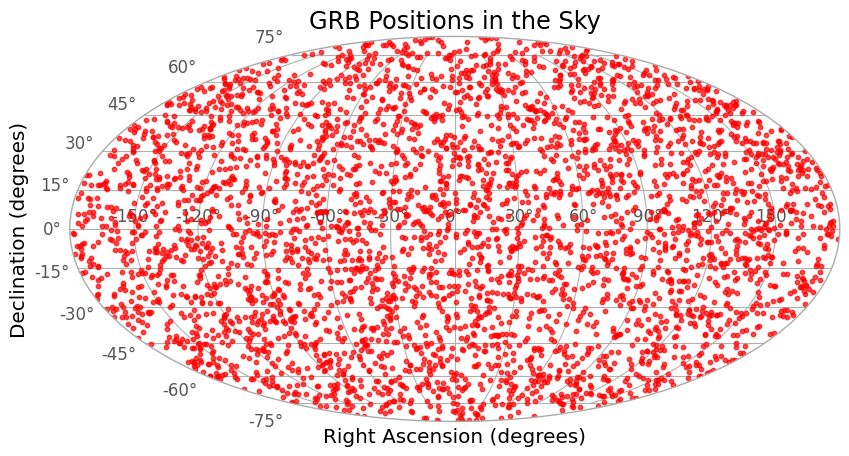

In [44]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization.wcsaxes import WCSAxes
plt.style.use(astropy_mpl_style)

ra = fdf['RA']
dec = fdf['DEC']

coords = SkyCoord(ra=ra.values * u.degree, dec=dec.values * u.degree, frame='icrs')

plt.figure(figsize=(10, 5))
plt.subplot(projection='mollweide')
plt.scatter(coords.ra.wrap_at(180 * u.deg).radian, coords.dec.radian, s=10, c='red', marker='o', alpha=0.7)

plt.grid(True)
plt.title('GRB Positions in the Sky')
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')

plt.show()


In [45]:
# from bokeh.plotting import figure, show, output_file
# from bokeh.io import output_notebook
# from scipy.stats import gaussian_kde
# import numpy as np
# from bokeh.io import output_notebook
# output_notebook()

# # Mollweide projection conversion
# def mollweide_projection(ra, dec):
#     ra_rad = np.radians(ra - 180)  # Shift RA to center around 0
#     dec_rad = np.radians(dec)
#     x = 2 * np.sqrt(2) * ra_rad * np.cos(dec_rad / 2) / np.pi
#     y = np.sqrt(2) * np.sin(dec_rad / 2)
#     return x, y

# # Get Mollweide projected coordinates
# x, y = mollweide_projection(fdf['RA'].values, fdf['DEC'].values)

# # Gaussian smearing
# def gaussian_smear(x, y, bandwidth=0.1, num_points=1000):
#     # Create a Gaussian KDE
#     xy = np.vstack([x, y])
#     kde = gaussian_kde(xy, bw_method=bandwidth)

#     # Generate points for the smoothed plot
#     x_grid = np.linspace(x.min(), x.max(), num_points)
#     y_grid = np.linspace(y.min(), y.max(), num_points)
#     x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
#     positions = np.vstack([x_mesh.ravel(), y_mesh.ravel()])
#     values = kde(positions).reshape(x_mesh.shape)

#     return x_mesh, y_mesh, values

# # Perform Gaussian smearing
# x_mesh, y_mesh, values = gaussian_smear(x, y)

# # Create a Bokeh figure for the Mollweide projection
# p = figure(title="GRB Positions with Gaussian Smear", 
#            x_axis_label="X (Mollweide)", 
#            y_axis_label="Y (Mollweide)", 
#            width=800,  # Replace plot_width with width
#            height=400)  # Replace plot_height with height

# # Add the Gaussian smear as an image
# p.image(image=[values], x=x.min(), y=y.min(), dw=x.max() - x.min(), dh=y.max() - y.min(), palette="Viridis256", level="image")

# # Overlay the original scatter points
# p.scatter(x, y, size=5, color="navy", alpha=0.5)
# output_file("plot.html")

# # Show the plot
# show(p)


In [46]:
if isFermi :
    print("available columns", fdf.columns)
    custom_drop = ['RA', 'DEC', 'TRIGGER_TIME', 'T90', 'T90_ERROR', 'T90_START',
       'FLUENCE_ERROR', 'FLUX_1024_ERROR', 'FLUX_1024_TIME',
       'FLUX_64_ERROR', 'FLNC_BAND_EPEAK', 'ERROR_RADIUS', 'T50',
       'T50_ERROR', 'T50_START', 'PFLX_PLAW_AMPL', 'PFLX_PLAW_PIVOT',
       'PFLX_PLAW_INDEX', 'PFLX_PLAW_INDEX_POS_ERR', 'PFLX_PLAW_INDEX_NEG_ERR',
       'PFLX_PLAW_PHTFLUX', 'PFLX_PLAW_PHTFLNC', 'PFLX_PLAW_ERGFLUX',
       'PFLX_COMP_EPEAK', 'PFLX_COMP_PIVOT', 'PFLX_BAND_EPEAK',
       'PFLX_BAND_ALPHA', 'PFLX_BAND_BETA', 'PFLX_BAND_PHTFLUX']
else :
    print(fdf.columns)
    custom_drop = ["TRIGGER_NUM","TIME","RA","T90", "T50","DEC","T50_ERROR","T90_ERROR",'FLUX_64_ERROR', 'FLUX_256_ERROR','FLUX_1024_ERROR','FLUENCE_1_ERROR','FLUENCE_2_ERROR','FLUENCE_3_ERROR','FLUENCE_4_ERROR',"µ_Z_H06","PI_50%","PI_90%","µ_Z_L08","PI_50%.1","PI_90%.1","µ_Z_B10","PI_50%.2","PI_90%.2"]
# custom_drop = ["TRIGGER_NUM","TIME","RA","T90", "T50","DEC","T50_ERROR","T90_ERROR",'FLUX_64_ERROR', 'FLUX_256_ERROR','FLUX_1024_ERROR','FLUENCE_1_ERROR','FLUENCE_2_ERROR','FLUENCE_3_ERROR','FLUENCE_4_ERROR',"PI_50%","PI_90%","µ_Z_L08","PI_50%.1","PI_90%.1","µ_Z_B10","PI_50%.2","PI_90%.2"]

print("dropped columns", fdf.columns)

fdf = fdf.drop(columns=custom_drop, axis=1)
fdf.describe()


available columns Index(['RA', 'DEC', 'TRIGGER_TIME', 'T90', 'T90_ERROR', 'T90_START', 'FLUENCE',
       'FLUENCE_ERROR', 'FLUX_1024', 'FLUX_1024_ERROR', 'FLUX_1024_TIME',
       'FLUX_64', 'FLUX_64_ERROR', 'FLNC_BAND_EPEAK', 'ERROR_RADIUS', 'T50',
       'T50_ERROR', 'T50_START', 'PFLX_PLAW_AMPL', 'PFLX_PLAW_PIVOT',
       'PFLX_PLAW_INDEX', 'PFLX_PLAW_INDEX_POS_ERR', 'PFLX_PLAW_INDEX_NEG_ERR',
       'PFLX_PLAW_PHTFLUX', 'PFLX_PLAW_PHTFLNC', 'PFLX_PLAW_ERGFLUX',
       'PFLX_COMP_EPEAK', 'PFLX_COMP_PIVOT', 'PFLX_BAND_EPEAK',
       'PFLX_BAND_ALPHA', 'PFLX_BAND_BETA', 'PFLX_BAND_PHTFLUX'],
      dtype='object')
dropped columns Index(['RA', 'DEC', 'TRIGGER_TIME', 'T90', 'T90_ERROR', 'T90_START', 'FLUENCE',
       'FLUENCE_ERROR', 'FLUX_1024', 'FLUX_1024_ERROR', 'FLUX_1024_TIME',
       'FLUX_64', 'FLUX_64_ERROR', 'FLNC_BAND_EPEAK', 'ERROR_RADIUS', 'T50',
       'T50_ERROR', 'T50_START', 'PFLX_PLAW_AMPL', 'PFLX_PLAW_PIVOT',
       'PFLX_PLAW_INDEX', 'PFLX_PLAW_INDEX_POS_ERR', 'PFLX_PLA

,FLUENCE,FLUX_1024,FLUX_64
count,3.875000e+03,3875.000000,3875.000000
mean,2.219566e-05,10.172693,17.928451
std,6.278035e-04,49.781516,95.972622
min,0.000000e+00,-0.546500,0.000000
25%,9.216600e-07,2.227950,4.761900
50%,2.779400e-06,3.741100,6.841200
75%,8.057200e-06,7.474300,12.674100
max,3.883600e-02,2385.000000,3411.570000


In [47]:
from scipy.stats import median_abs_deviation

# Normalize by median and MAD
if normalize :
    fdf = (fdf - fdf.median()) / median_abs_deviation(fdf, scale='normal')

In [48]:
# # Normalize by mean (z-score normalization)
# fdf = (fdf - fdf.mean()) / fdf.std()

# print("\nNormalized by Mean (Z-Score):")
# print(fdf)

In [49]:
fdf

,FLUENCE,FLUX_1024,FLUX_64
0,-0.753290,-0.706220,-1.048336
1,5.685683,5.214387,5.521740
2,-0.403167,-0.067569,-0.258141
3,-0.554320,-0.385939,-0.375582
4,0.750989,82.527394,844.284808
...,...,...,...
3870,-0.711698,-0.056272,3.416638
3871,-0.194361,1.632148,2.874095
3872,2.465805,0.683626,0.174003
3873,0.161943,3.505817,4.291441


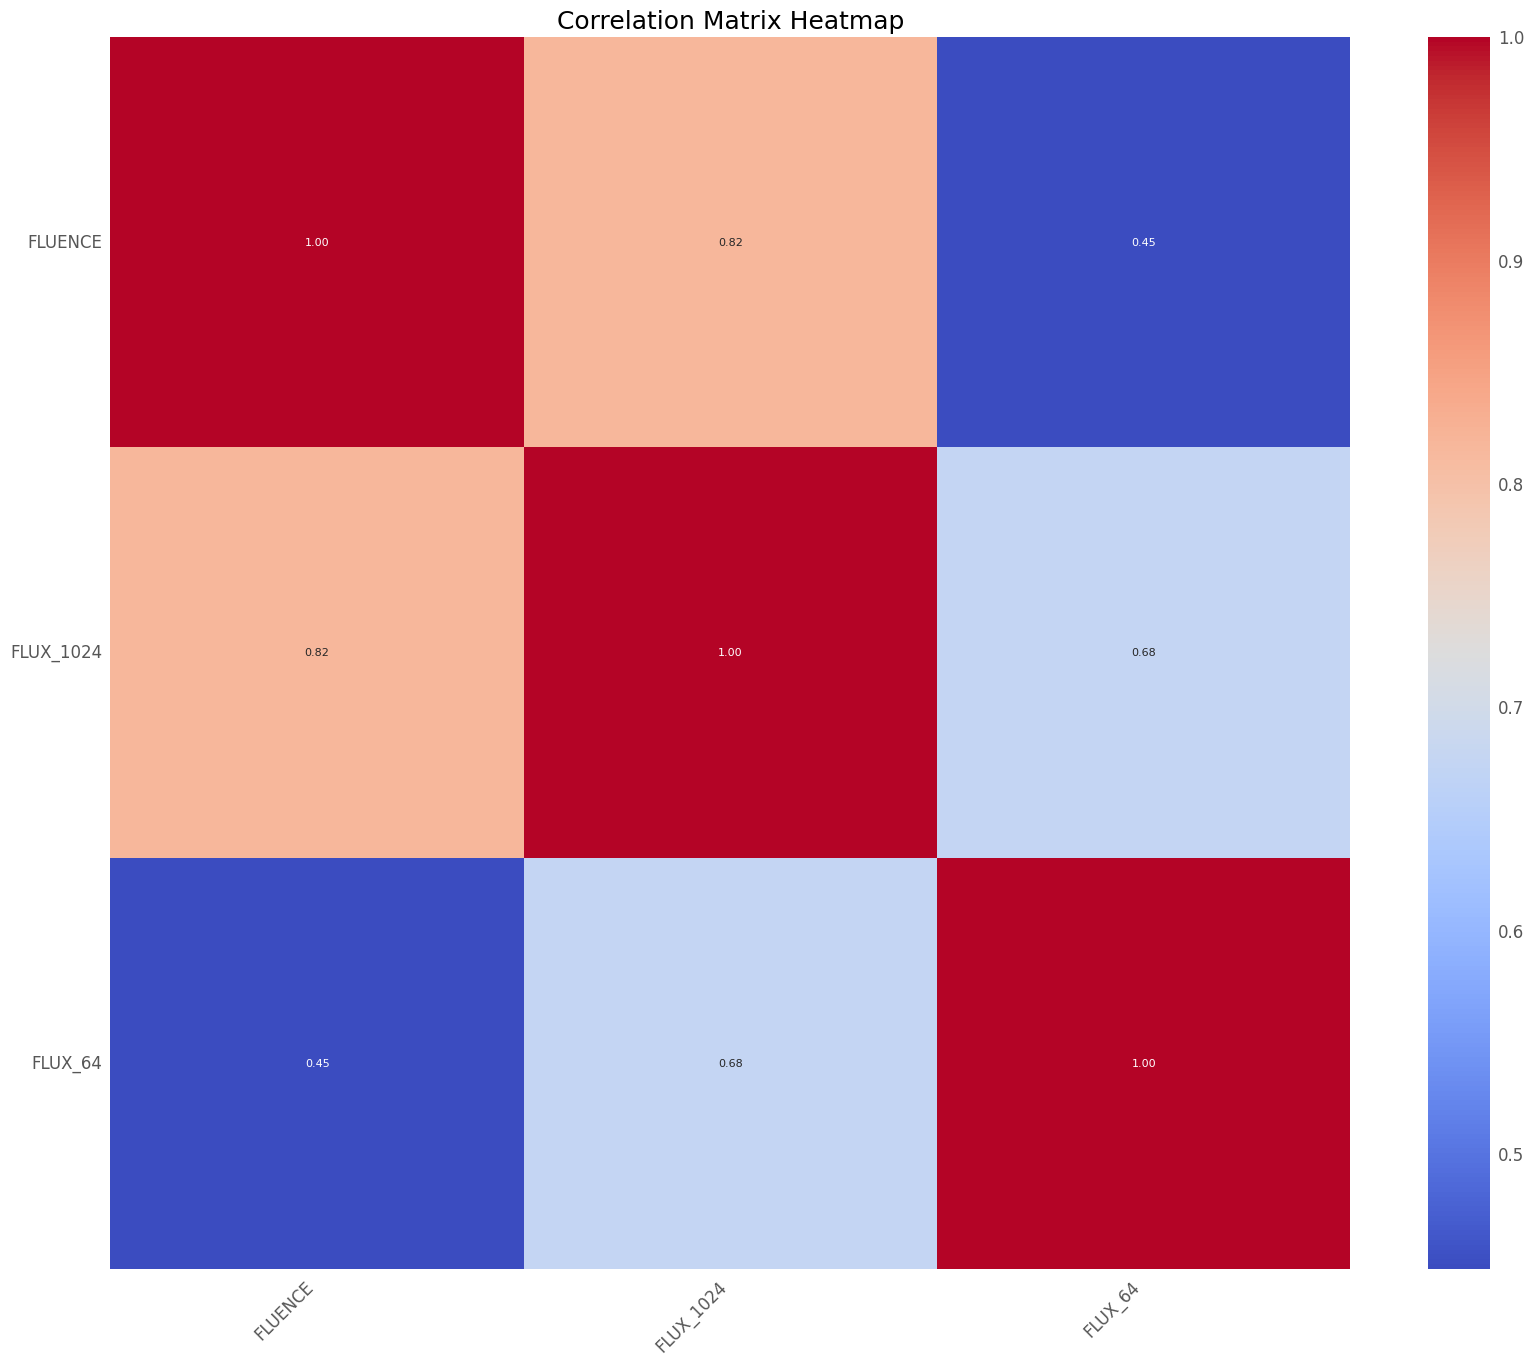

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = fdf.corr()

# Create a heatmap with larger figure size and better label handling
plt.figure(figsize=(20, 16))  # Adjust width and height as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 8})  # Smaller text for annotations
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.show()


In [51]:
tempDF = fdf


In [52]:
tempDF.columns

Index(['FLUENCE', 'FLUX_1024', 'FLUX_64'], dtype='object')

In [53]:
fdf = tempDF
if isFermi :
    fdf = fdf.drop(columns=["FLUX_64"], axis=1)
else :
    # fdf = fdf.drop(columns=["FLUX_64","FLUX_256","FLUX_1024"], axis=1)
    fdf = fdf.drop(columns=['FLUENCE_1', 'FLUENCE_2', 'FLUENCE_3',"FLUENCE_4"], axis=1)
    # fdf = fdf.drop(columns=[], axis=1)

fdf

,FLUENCE,FLUX_1024
0,-0.753290,-0.706220
1,5.685683,5.214387
2,-0.403167,-0.067569
3,-0.554320,-0.385939
4,0.750989,82.527394
...,...,...
3870,-0.711698,-0.056272
3871,-0.194361,1.632148
3872,2.465805,0.683626
3873,0.161943,3.505817


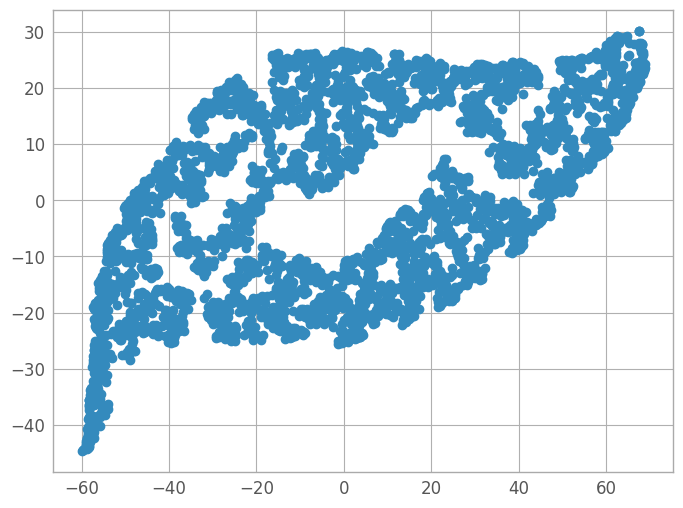

In [54]:
from sklearn.manifold import TSNE

# Sample DataFrame creation (Replace this with your actual DataFrame)
# df = pd.read_csv("your_data_file.csv")
for column in fdf.columns :
    nan_count = fdf[column].isna().sum()
    if verbose :
        print(f"Number of NaN values in the {column}: {nan_count}")



# Impute NaN values with column means
# df_imputed = fdf.fillna(fdf.mean())

filter_nans = False

if filter_nans :
    fdf = fdf.dropna()
    df = df.loc[fdf.index]
    df_imputed = fdf
else :
    df_imputed = fdf.fillna(fdf.mean())

tsne = TSNE(n_components=2, random_state=50,early_exaggeration=50,perplexity=50)
tsne_result = tsne.fit_transform(df_imputed)

# Convert the result to a DataFrame for further analysis
tsne_df = pd.DataFrame(tsne_result, columns=['x', 'y'],index=fdf.index)
plt.scatter(tsne_df.x,tsne_df.y)

In [55]:
df_imputed

,FLUENCE,FLUX_1024
0,-0.753290,-0.706220
1,5.685683,5.214387
2,-0.403167,-0.067569
3,-0.554320,-0.385939
4,0.750989,82.527394
...,...,...
3870,-0.711698,-0.056272
3871,-0.194361,1.632148
3872,2.465805,0.683626
3873,0.161943,3.505817


In [56]:
if not isFermi :
    # merged_df = df.merge(redshift, on="TRIGGER_NUM", how="left").dropna(subset=['µ_Z_H06'])
    merged_df = df.merge(redshift, on="TRIGGER_NUM", how="left")
    merged_df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


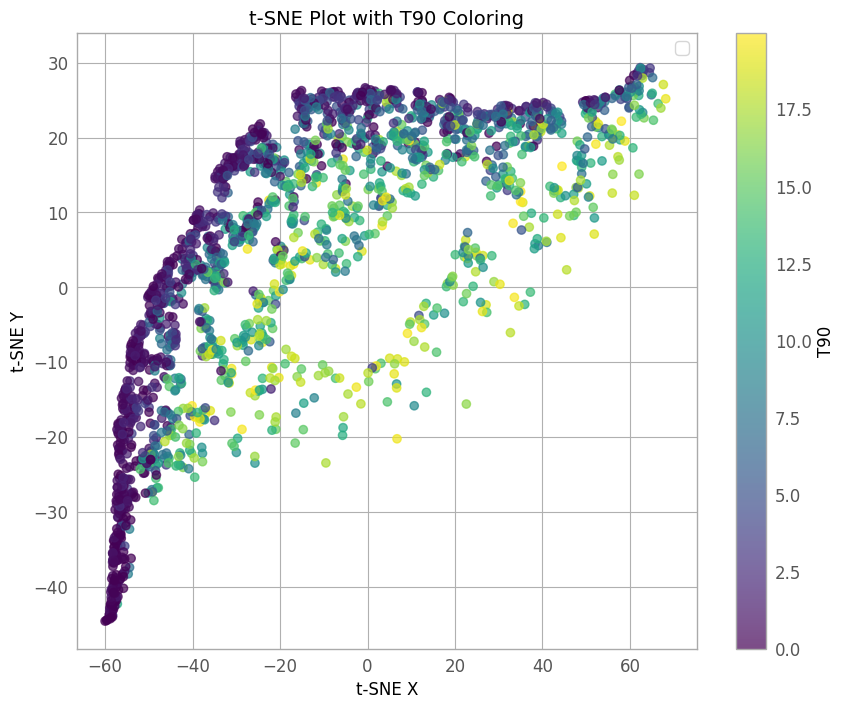

In [57]:
if not isFermi :
    redshift_values = merged_df.loc[tsne_df.index, 'µ_Z_B10']

    redshift_values.loc[redshift_values[redshift_values==0].index] = np.nan

    missing_redshift_mask = redshift_values.isna()

    plt.figure(figsize=(10, 8))

    # Plot points with valid redshift values
    scatter = plt.scatter(
        tsne_df.loc[~missing_redshift_mask, 'x'],  # x values for valid redshift
        tsne_df.loc[~missing_redshift_mask, 'y'],  # y values for valid redshift
        c=redshift_values.loc[~missing_redshift_mask],  # Color by redshift
        cmap='viridis',  # Colormap for redshift
        alpha=0.7,  # Transparency
        label='Valid Redshift'
    )

    # Plot points with missing redshift values in grey
    plt.scatter(
        tsne_df.loc[missing_redshift_mask, 'x'],  # x values for missing redshift
        tsne_df.loc[missing_redshift_mask, 'y'],  # y values for missing redshift
        c='grey',  # Grey color
        alpha=0.0,  # Transparency
        label='Missing Redshift'
    )

    # Add a colorbar for the redshift values
    cbar = plt.colorbar(scatter, label='Redshift (µ_Z_H06)')
    cbar.set_label('Redshift (µ_Z_H06)', fontsize=12)

    # Add labels and title
    plt.xlabel('t-SNE X', fontsize=12)
    plt.ylabel('t-SNE Y', fontsize=12)
    plt.title('t-SNE Plot with Redshift Coloring', fontsize=14)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()


else :

    
    T90 = df.loc[tsne_df.index, 'T90']

    T90.loc[T90[T90>20].index] = np.nan

    missing_redshift_mask = T90.isna()

    plt.figure(figsize=(10, 8))

    # Plot points with valid redshift values
    scatter = plt.scatter(
        tsne_df.loc[~missing_redshift_mask, 'x'],  # x values for valid redshift
        tsne_df.loc[~missing_redshift_mask, 'y'],  # y values for valid redshift
        c=T90.loc[~missing_redshift_mask],  # Color by redshift
        cmap='viridis',  # Colormap for redshift
        alpha=0.7,  # Transparency
    )

    # Plot points with missing redshift values in grey
    plt.scatter(
        tsne_df.loc[missing_redshift_mask, 'x'],  # x values for missing redshift
        tsne_df.loc[missing_redshift_mask, 'y'],  # y values for missing redshift
        c='grey',  # Grey color
        alpha=0.0,  # Transparency
    )

    # Add a colorbar for the redshift values
    cbar = plt.colorbar(scatter, label='T90')
    cbar.set_label('T90', fontsize=12)

    # Add labels and title
    plt.xlabel('t-SNE X', fontsize=12)
    plt.ylabel('t-SNE Y', fontsize=12)
    plt.title('t-SNE Plot with T90 Coloring', fontsize=14)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


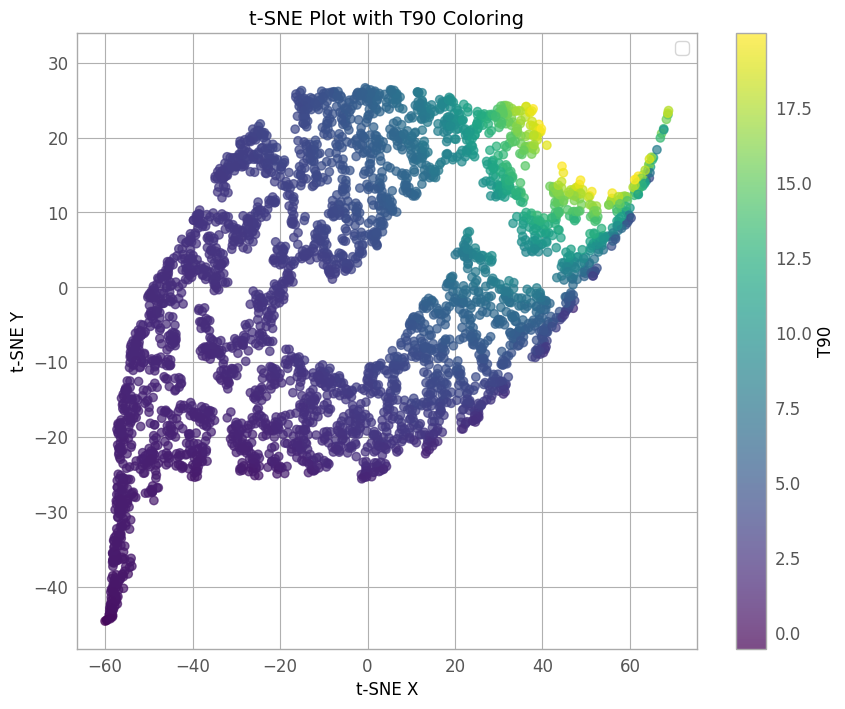

In [58]:
if not isFermi :
    redshift_values = merged_df.loc[tsne_df.index, 'µ_Z_B10']

    redshift_values.loc[redshift_values[redshift_values==0].index] = np.nan

    missing_redshift_mask = redshift_values.isna()

    plt.figure(figsize=(10, 8))

    # Plot points with valid redshift values
    scatter = plt.scatter(
        tsne_df.loc[~missing_redshift_mask, 'x'],  # x values for valid redshift
        tsne_df.loc[~missing_redshift_mask, 'y'],  # y values for valid redshift
        c=redshift_values.loc[~missing_redshift_mask],  # Color by redshift
        cmap='viridis',  # Colormap for redshift
        alpha=0.7,  # Transparency
        label='Valid Redshift'
    )

    # Plot points with missing redshift values in grey
    plt.scatter(
        tsne_df.loc[missing_redshift_mask, 'x'],  # x values for missing redshift
        tsne_df.loc[missing_redshift_mask, 'y'],  # y values for missing redshift
        c='grey',  # Grey color
        alpha=0.0,  # Transparency
        label='Missing Redshift'
    )

    # Add a colorbar for the redshift values
    cbar = plt.colorbar(scatter, label='Redshift (µ_Z_H06)')
    cbar.set_label('Redshift (µ_Z_H06)', fontsize=12)

    # Add labels and title
    plt.xlabel('t-SNE X', fontsize=12)
    plt.ylabel('t-SNE Y', fontsize=12)
    plt.title('t-SNE Plot with Redshift Coloring', fontsize=14)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()


else :

    
    T90 = df.loc[tsne_df.index, 'FLUX_1024']

    T90.loc[T90[T90>20].index] = np.nan

    missing_redshift_mask = T90.isna()

    plt.figure(figsize=(10, 8))

    # Plot points with valid redshift values
    scatter = plt.scatter(
        tsne_df.loc[~missing_redshift_mask, 'x'],  # x values for valid redshift
        tsne_df.loc[~missing_redshift_mask, 'y'],  # y values for valid redshift
        c=T90.loc[~missing_redshift_mask],  # Color by redshift
        cmap='viridis',  # Colormap for redshift
        alpha=0.7,  # Transparency
    )

    # Plot points with missing redshift values in grey
    plt.scatter(
        tsne_df.loc[missing_redshift_mask, 'x'],  # x values for missing redshift
        tsne_df.loc[missing_redshift_mask, 'y'],  # y values for missing redshift
        c='grey',  # Grey color
        alpha=0.0,  # Transparency
    )

    # Add a colorbar for the redshift values
    cbar = plt.colorbar(scatter, label='T90')
    cbar.set_label('T90', fontsize=12)

    # Add labels and title
    plt.xlabel('t-SNE X', fontsize=12)
    plt.ylabel('t-SNE Y', fontsize=12)
    plt.title('t-SNE Plot with T90 Coloring', fontsize=14)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

In [59]:
if not isFermi :
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from matplotlib.colors import BoundaryNorm, ListedColormap

    # Create a mask for missing redshift values
    missing_redshift_mask = redshift_values.isna()

    # Define the color bins and corresponding colors
    bin_edges = np.arange(0, redshift_values.max() + 0.5, 0.5)  # Bins every 0.5
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink','gold',"olive"]  # Add more colors if needed
    cmap = ListedColormap(colors[:len(bin_edges) - 1])  # Create a colormap
    norm = BoundaryNorm(bin_edges, cmap.N)  # Normalize the bins

    # Plot
    plt.figure(figsize=(10, 8))

    # Plot points with valid redshift values
    scatter = plt.scatter(
        tsne_df.loc[~missing_redshift_mask, 'x'],  # x values for valid redshift
        tsne_df.loc[~missing_redshift_mask, 'y'],  # y values for valid redshift
        c=redshift_values.loc[~missing_redshift_mask],  # Color by redshift
        cmap=cmap,  # Use the discrete colormap
        norm=norm,  # Use the BoundaryNorm for binning
        alpha=0.7,  # Transparency
        label='Valid Redshift'
    )

    # Plot points with missing redshift values in grey
    plt.scatter(
        tsne_df.loc[missing_redshift_mask, 'x'],  # x values for missing redshift
        tsne_df.loc[missing_redshift_mask, 'y'],  # y values for missing redshift
        c='grey',  # Grey color
        alpha=0.1,  # Transparency
        label='Missing Redshift'
    )

    # Add a colorbar for the redshift values
    cbar = plt.colorbar(scatter, ticks=bin_edges, label='Redshift (µ_Z_H06)')
    cbar.set_label('Redshift (µ_Z_H06)', fontsize=12)

    # Add labels and title
    plt.xlabel('t-SNE X', fontsize=12)
    plt.ylabel('t-SNE Y', fontsize=12)
    plt.title('t-SNE Plot with Discrete Redshift Coloring', fontsize=14)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

<Axes: ylabel='Density'>

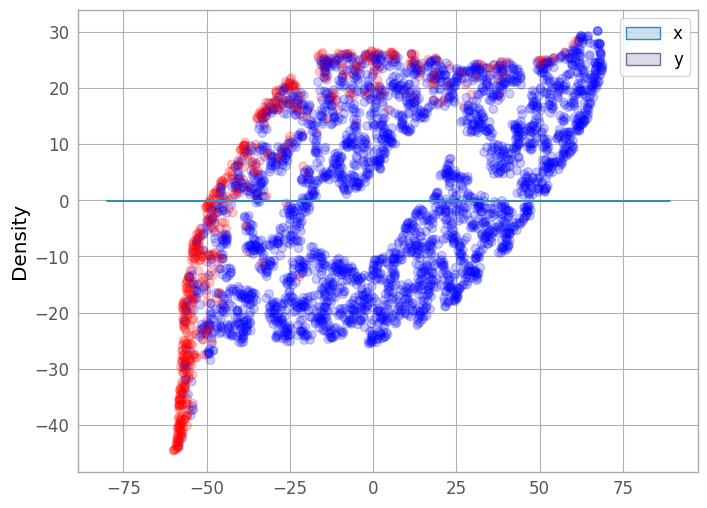

In [60]:
import seaborn as sns

colors = []
# for GRB in fdf.index :
#     if math.isnan(fdf["BAT 1-sec Peak Photon Flux (15-150 keV) [ph/cm^2/sec]"][GRB]) :
#         colors.append("red")
#     elif math.isnan(fdf["XRT 24 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s]"][GRB]) :
#         colors.append("blue")
#     elif math.isnan(fdf["XRT 11 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s]"][GRB]) :
#         colors.append("cyan")
#     elif math.isnan(fdf["BAT 1-sec Peak Photon Flux (15-150 keV) [ph/cm^2/sec]"][GRB]) :
#         colors.append("green")
#     else :
#         colors.append("Gray")

short_tninety= []
long_tninety= []
for GRB in fdf.index :
    if df["T90"].loc[GRB] >= 2.0:
        colors.append("blue")
        long_tninety.append(GRB)
    elif df["T90"].loc[GRB] < 2.0 :
        colors.append("red")
        short_tninety.append(GRB)
    else :
        colors.append("Gray")

plt.scatter(tsne_df.x,tsne_df.y,c=colors,alpha=0.2)
sns.kdeplot(tsne_df, fill=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


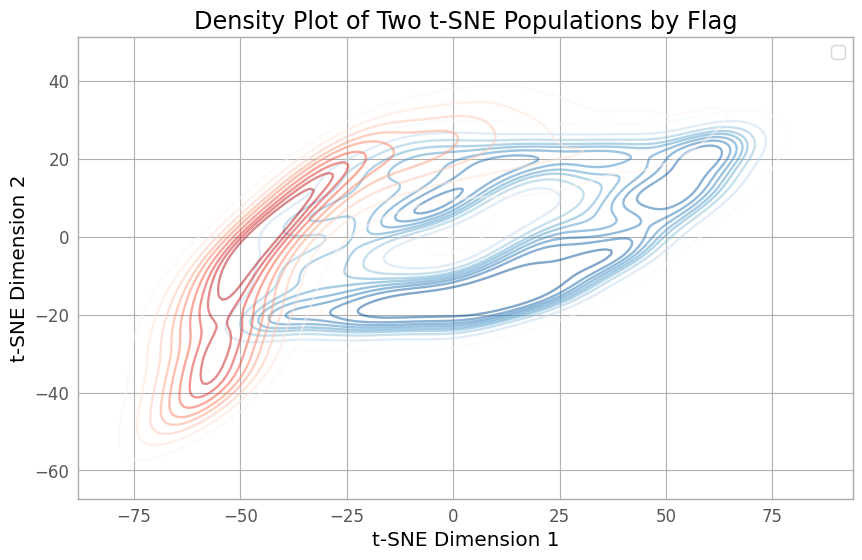

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df contains your t-SNE results ('x_tsne', 'y_tsne') and 'flag_column'
# Create a density plot for each population based on the flag

plt.figure(figsize=(10, 6))

# Population 1: flag == 0
sns.kdeplot(x=tsne_df.x.loc[df['T90'] >= 2.0], 
            y=tsne_df.y.loc[df['T90'] >= 2.0], 
            fill=False, cmap="Blues", label='Population 1 (flag=0)', alpha=0.5)

# Population 2: flag == 1
sns.kdeplot(x=tsne_df.x.loc[df['T90'] < 2.0], 
            y=tsne_df.y.loc[df['T90'] < 2.0], 
            fill=False, cmap="Reds", label='Population 2 (flag=1)', alpha=0.5)

# Add labels and legend
plt.title('Density Plot of Two t-SNE Populations by Flag')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

plt.show()


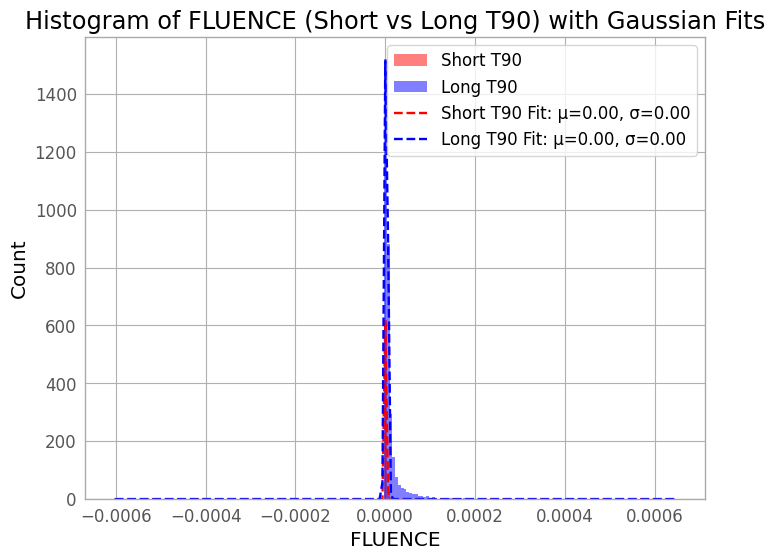

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# Define the Gaussian function
def gaussian(x, amp, mean, std):
    return amp * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Define the parameter and bin edges
parameter = df.FLUENCE
bin_edges = np.linspace(
    parameter.mean() - parameter.std(),  # Lower bound
    parameter.mean() + parameter.std(),  # Upper bound
    num=201  # Number of bin edges (200 bins)
)

# Compute histograms
hist_short, bin_edges = np.histogram(parameter.loc[short_tninety], bins=bin_edges)
hist_long, _ = np.histogram(parameter.loc[long_tninety], bins=bin_edges)

# Bin centers for fitting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit Gaussian to short_tninety
popt_short, pcov_short = curve_fit(gaussian, bin_centers, hist_short, p0=[max(hist_short), np.mean(parameter.loc[short_tninety]), np.std(parameter.loc[short_tninety])])
amp_short, mean_short, std_short = popt_short

# Fit Gaussian to long_tninety
popt_long, pcov_long = curve_fit(gaussian, bin_centers, hist_long, p0=[max(hist_long), np.mean(parameter.loc[long_tninety]), np.std(parameter.loc[long_tninety])])
amp_long, mean_long, std_long = popt_long

# Plot the histograms
plt.hist(parameter.loc[short_tninety], bins=bin_edges, color="red", alpha=0.5, label="Short T90")
plt.hist(parameter.loc[long_tninety], bins=bin_edges, color="blue", alpha=0.5, label="Long T90")

# Plot the Gaussian fits
plt.plot(bin_centers, gaussian(bin_centers, *popt_short), color="red", linestyle="--", label=f"Short T90 Fit: μ={mean_short:.2f}, σ={std_short:.2f}")
plt.plot(bin_centers, gaussian(bin_centers, *popt_long), color="blue", linestyle="--", label=f"Long T90 Fit: μ={mean_long:.2f}, σ={std_long:.2f}")

# Add labels and legend
plt.xlabel(parameter.name)
plt.ylabel("Count")
plt.title("Histogram of FLUENCE (Short vs Long T90) with Gaussian Fits")
plt.legend()

# Show the plot
plt.show()

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# Define the Gaussian function
def gaussian(x, amp, mean, std):
    return amp * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Function to fit Gaussian and return parameters
def fit_gaussian(parameter, data_short, data_long, num_bins=201):
    # Define bin edges
    bin_edges = np.linspace(
        parameter.mean() - parameter.std(),  # Lower bound
        parameter.mean() + parameter.std(),  # Upper bound
        num=num_bins  # Number of bin edges
    )
    
    # Compute histograms
    hist_short, _ = np.histogram(data_short, bins=bin_edges)
    hist_long, _ = np.histogram(data_long, bins=bin_edges)
    
    # Bin centers for fitting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Fit Gaussian to short_tninety
    popt_short, _ = curve_fit(gaussian, bin_centers, hist_short, p0=[max(hist_short), np.mean(data_short), np.std(data_short)])
    amp_short, mean_short, std_short = popt_short
    
    # Fit Gaussian to long_tninety
    popt_long, _ = curve_fit(gaussian, bin_centers, hist_long, p0=[max(hist_long), np.mean(data_long), np.std(data_long)])
    amp_long, mean_long, std_long = popt_long
    
    return {
        'short': {'mean': mean_short, 'std': std_short},
        'long': {'mean': mean_long, 'std': std_long}
    }

# Fit Gaussian distributions for each parameter
parameters = {
    'FLUX_64': df.FLUX_64,
    'FLUX_1024': df.FLUX_1024,
    'FLUENCE': df.FLUENCE *1E6
}

fitted_params = {}
for param_name, param_values in parameters.items():
    fitted_params[param_name] = fit_gaussian(param_values, param_values.loc[short_tninety], param_values.loc[long_tninety])

# Print fitted parameters
for param_name, params in fitted_params.items():
    print(f"Fitted parameters for {param_name}:")
    print(f"  Short T90: μ={params['short']['mean']:.2f}, σ={params['short']['std']:.2f}")
    print(f"  Long T90: μ={params['long']['mean']:.2f}, σ={params['long']['std']:.2f}")

Fitted parameters for FLUX_64:
  Short T90: μ=6.01, σ=-2.77
  Long T90: μ=5.29, σ=1.97
Fitted parameters for FLUX_1024:
  Short T90: μ=1.62, σ=-0.89
  Long T90: μ=3.03, σ=-1.57
Fitted parameters for FLUENCE:
  Short T90: μ=2.14, σ=1.55
  Long T90: μ=2.49, σ=3.23


In [64]:
def calculate_probability(parameter_values, fitted_params):
    """
    Calculate the probability of a given set of parameter values belonging to short or long T90.
    
    Parameters:
        parameter_values (dict): Dictionary of parameter values, e.g., {'FLUX_64': value1, 'FLUX_1024': value2, 'FLUENCE': value3}
        fitted_params (dict): Dictionary of fitted parameters for each parameter and class.
    
    Returns:
        dict: Probabilities for short and long T90.
    """
    prob_short = 1.0
    prob_long = 1.0
    
    for param_name, value in parameter_values.items():
        # Get fitted parameters for short and long T90
        mean_short = fitted_params[param_name]['short']['mean']
        std_short = fitted_params[param_name]['short']['std']
        mean_long = fitted_params[param_name]['long']['mean']
        std_long = fitted_params[param_name]['long']['std']
        
        # Calculate probability density for short and long T90
        prob_short *= norm.pdf(value, mean_short, std_short)
        prob_long *= norm.pdf(value, mean_long, std_long)
    
    # Normalize probabilities
    total_prob = prob_short + prob_long
    prob_short /= total_prob
    prob_long /= total_prob
    
    return {'short_tninety': prob_short, 'long_tninety': prob_long}

# Example usage
parameter_values = {
    'FLUX_64': 5.8002,
    'FLUX_1024': 3.5503,
    'FLUENCE': 1.420100e-06 * 1e6
}

probabilities = calculate_probability(parameter_values, fitted_params)
print(f"Probabilities: Short T90 = {probabilities['short_tninety']:.4f}, Long T90 = {probabilities['long_tninety']:.4f}")

Probabilities: Short T90 = nan, Long T90 = nan


In [65]:
df

,NAME,RA,DEC,TRIGGER_TIME,T90,T90_ERROR,T90_START,FLUENCE,FLUENCE_ERROR,FLUX_1024,...,PFLX_PLAW_INDEX_NEG_ERR,PFLX_PLAW_PHTFLUX,PFLX_PLAW_PHTFLNC,PFLX_PLAW_ERGFLUX,PFLX_COMP_EPEAK,PFLX_COMP_PIVOT,PFLX_BAND_EPEAK,PFLX_BAND_ALPHA,PFLX_BAND_BETA,PFLX_BAND_PHTFLUX
0,NaN,55.3384,-89.0093,56020.856927,4.288,1.935,-3.968,2.396400e-07,2.045800e-08,1.7469,...,0.072564,2.004649,2.045939,3.451636e-07,205.7393,100.0,202.53480,-0.521362,-2.802798,1.837350
1,NaN,256.7300,-88.8600,55984.725475,17.408,0.810,0.256,2.194900e-05,1.040300e-07,18.4653,...,0.022620,23.012680,23.446380,2.615053e-06,204.6519,100.0,123.06730,-0.339711,-2.277248,17.925290
2,NaN,13.0800,-87.7700,60088.357309,11.008,4.720,-5.632,1.420100e-06,4.245700e-08,3.5503,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
3,NaN,155.2200,-77.5100,60248.143988,11.520,2.573,-1.536,9.104800e-07,2.082500e-08,2.6513,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
4,NaN,291.8300,-77.3600,60421.223610,4.096,1.864,-5.120,5.311400e-06,9.333200e-06,236.7790,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,NaN,119.3200,87.1100,59389.040547,0.304,0.333,-0.032,3.798700e-07,2.017400e-08,3.5822,...,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.0,0.00000,0.000000,0.000000,0.000000
3871,NaN,109.4000,87.2700,55116.782671,0.704,2.499,0.000,2.124100e-06,4.401700e-08,8.3499,...,0.039825,22.930840,1.453232,5.362506e-06,1049.7280,100.0,1051.90800,-0.254330,-12.778120,21.417150
3872,NaN,138.7380,87.2700,56440.695421,55.553,1.864,0.576,1.109300e-05,1.202000e-07,5.6715,...,0.024157,5.688344,5.803018,1.239637e-06,230.3470,100.0,211.48220,0.227613,-2.894047,5.244317
3873,NaN,225.8020,88.5687,55056.174104,7.552,0.362,0.384,3.325400e-06,4.154000e-08,13.6407,...,0.025906,9.539146,9.718811,1.171084e-06,157.2283,100.0,63.36254,-0.160687,-2.031565,8.829557


In [66]:
df[(["FLUENCE","FLUX_64","FLUX_1024"])]

,FLUENCE,FLUX_64,FLUX_1024
0,2.396400e-07,2.6136,1.7469
1,2.194900e-05,29.1086,18.4653
2,1.420100e-06,5.8002,3.5503
3,9.104800e-07,5.3266,2.6513
4,5.311400e-06,3411.5700,236.7790
...,...,...,...
3870,3.798700e-07,20.6194,3.5822
3871,2.124100e-06,18.4315,8.3499
3872,1.109300e-05,7.5429,5.6715
3873,3.325400e-06,24.1472,13.6407


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import lognorm, norm

# Define the Gaussian function
def gaussian(x, amp, mean, std):
    return amp * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Function to fit Gaussian and return parameters
def fit_gaussian(parameter, data_short, data_long, num_bins=201):
    # Define bin edges
    bin_edges = np.linspace(
        parameter.mean() - parameter.std(),  # Lower bound
        parameter.mean() + parameter.std(),  # Upper bound
        num=num_bins  # Number of bin edges
    )
    
    # Compute histograms
    hist_short, _ = np.histogram(data_short, bins=bin_edges)
    hist_long, _ = np.histogram(data_long, bins=bin_edges)
    
    # Bin centers for fitting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Fit Gaussian to short_tninety
    popt_short, _ = curve_fit(gaussian, bin_centers, hist_short, p0=[max(hist_short), np.mean(data_short), np.std(data_short)])
    amp_short, mean_short, std_short = popt_short
    
    # Fit Gaussian to long_tninety
    popt_long, _ = curve_fit(gaussian, bin_centers, hist_long, p0=[max(hist_long), np.mean(data_long), np.std(data_long)])
    amp_long, mean_long, std_long = popt_long
    
    return {
        'short': {'mean': mean_short, 'std': std_short},
        'long': {'mean': mean_long, 'std': std_long}
    }

def fit_lognormal(parameter, data_short, data_long, num_bins=201):
    # Add a small positive offset to avoid numerical instability
    offset = 1e-10
    data_short = data_short + offset
    data_long = data_long + offset
    
    # Define bin edges on a logarithmic scale
    bin_edges = np.logspace(
        np.log10(data_short.min()),  # Lower bound (log scale)
        np.log10(data_short.max()),  # Upper bound (log scale)
        num=num_bins  # Number of bin edges
    )
    
    # Compute histograms
    hist_short, _ = np.histogram(data_short, bins=bin_edges)
    hist_long, _ = np.histogram(data_long, bins=bin_edges)
    
    # Bin centers for fitting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Fit log-normal to short_tninety
    shape_short, loc_short, scale_short = lognorm.fit(data_short, floc=0)
    
    # Fit log-normal to long_tninety
    shape_long, loc_long, scale_long = lognorm.fit(data_long, floc=0)
    
    return {
        'short': {'shape': shape_short, 'loc': loc_short, 'scale': scale_short},
        'long': {'shape': shape_long, 'loc': loc_long, 'scale': scale_long}
    }

# Fit Gaussian distributions for FLUX_64 and FLUX_1024
parameters = {
    'FLUX_64': df.FLUX_64,
    'FLUX_1024': df.FLUX_1024
}

fitted_params = {}
for param_name, param_values in parameters.items():
    fitted_params[param_name] = fit_gaussian(param_values, param_values.loc[short_tninety], param_values.loc[long_tninety])

df['FLUENCE'] = df.FLUENCE.clip(lower=1e-10)
# Fit log-normal distribution for FLUENCE
fitted_params['FLUENCE'] = fit_lognormal(df.FLUENCE, df.FLUENCE.loc[short_tninety], df.FLUENCE.loc[long_tninety])

# Print fitted parameters
for param_name, params in fitted_params.items():
    if 'std' in params['short']:  # Gaussian
        print(f"Fitted parameters for {param_name}:")
        print(f"  Short T90: μ={params['short']['mean']:.2f}, σ={params['short']['std']:.2f}")
        print(f"  Long T90: μ={params['long']['mean']:.2f}, σ={params['long']['std']:.2f}")
    else:  # Log-normal
        print(f"Fitted parameters for {param_name} (log-normal):")
        print(f"  Short T90: shape={params['short']['shape']:.2f}, loc={params['short']['loc']:.2f}, scale={params['short']['scale']:.2f}")
        print(f"  Long T90: shape={params['long']['shape']:.2f}, loc={params['long']['loc']:.2f}, scale={params['long']['scale']:.2f}")

def calculate_probability(parameter_values, fitted_params):
    """
    Calculate the probability of a given set of parameter values belonging to short or long T90.
    Supports both Gaussian and log-normal distributions.
    """
    prob_short = 1.0
    prob_long = 1.0
    
    for param_name, value in parameter_values.items():
        if param_name in fitted_params:
            if 'std' in fitted_params[param_name]['short']:  # Gaussian
                mean_short = fitted_params[param_name]['short']['mean']
                std_short = fitted_params[param_name]['short']['std']
                mean_long = fitted_params[param_name]['long']['mean']
                std_long = fitted_params[param_name]['long']['std']
                
                prob_short *= norm.pdf(value, mean_short, std_short)
                prob_long *= norm.pdf(value, mean_long, std_long)
            else:  # Log-normal
                shape_short = fitted_params[param_name]['short']['shape']
                loc_short = fitted_params[param_name]['short']['loc']
                scale_short = fitted_params[param_name]['short']['scale']
                shape_long = fitted_params[param_name]['long']['shape']
                loc_long = fitted_params[param_name]['long']['loc']
                scale_long = fitted_params[param_name]['long']['scale']
                
                # Ensure scale is positive
                if scale_short <= 0 or scale_long <= 0:
                    raise ValueError(f"Invalid scale parameter for {param_name}. Scale must be positive.")
                
                prob_short *= lognorm.pdf(value, shape_short, loc=loc_short, scale=scale_short)
                prob_long *= lognorm.pdf(value, shape_long, loc=loc_long, scale=scale_long)
    
    # Normalize probabilities
    total_prob = prob_short + prob_long
    if total_prob == 0:
        raise ValueError("Total probability is zero. Check the input values and fitted parameters.")
    
    prob_short /= total_prob
    prob_long /= total_prob
    
    return {'short_tninety': prob_short, 'long_tninety': prob_long}

# Example usage
parameter_values = {
    'FLUX_64': 5.8002,
    'FLUX_1024': 3.5503,
    'FLUENCE': 1.420100e-06
}

# Calculate probabilities
probabilities = calculate_probability(parameter_values, fitted_params)
print(f"Probabilities: Short T90 = {probabilities['short_tninety']:.4f}, Long T90 = {probabilities['long_tninety']:.4f}")

Fitted parameters for FLUX_64:
  Short T90: μ=6.01, σ=-2.77
  Long T90: μ=5.29, σ=1.97
Fitted parameters for FLUX_1024:
  Short T90: μ=1.62, σ=-0.89
  Long T90: μ=3.03, σ=-1.57
Fitted parameters for FLUENCE (log-normal):
  Short T90: shape=1.25, loc=0.00, scale=0.00
  Long T90: shape=1.41, loc=0.00, scale=0.00
Probabilities: Short T90 = nan, Long T90 = nan


(array([ 36.,  85., 117., 156., 155., 213., 198., 204., 201., 226., 178.,
        208., 185., 180., 176., 178., 143., 133., 140., 112.]),
 array([-58.27725601, -51.91973877, -45.56222153, -39.20470428,
        -32.84719086, -26.48967361, -20.13215637, -13.77463913,
         -7.41712284,  -1.05960596,   5.29791069,  11.65542698,
         18.01294327,  24.37046051,  30.72797775,  37.085495  ,
         43.44301224,  49.80052567,  56.15804291,  62.51556015,
         68.87307739]),
 <BarContainer object of 20 artists>)

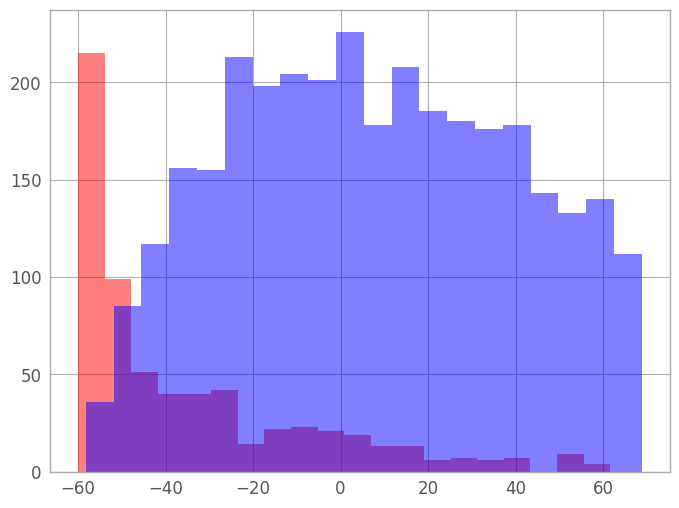

In [68]:
plt.hist(tsne_df.x.loc[short_tninety],bins=20,color="red",alpha=0.5)
plt.hist(tsne_df.x.loc[long_tninety],bins=20,color="blue",alpha=0.5)

(array([  2.,   4.,   2.,   6.,  18., 192., 262., 233., 248., 224., 177.,
        182., 200., 219., 217., 234., 249., 267., 255.,  33.]),
 array([-43.81493378, -40.11397552, -36.41302109, -32.71206284,
        -29.0111084 , -25.31015205, -21.60919571, -17.90823936,
        -14.20728207, -10.50632572,  -6.80536938,  -3.10441303,
          0.59654349,   4.29750013,   7.99845648,  11.6994133 ,
         15.40036964,  19.10132599,  22.80228233,  26.50323868,
         30.20419502]),
 <BarContainer object of 20 artists>)

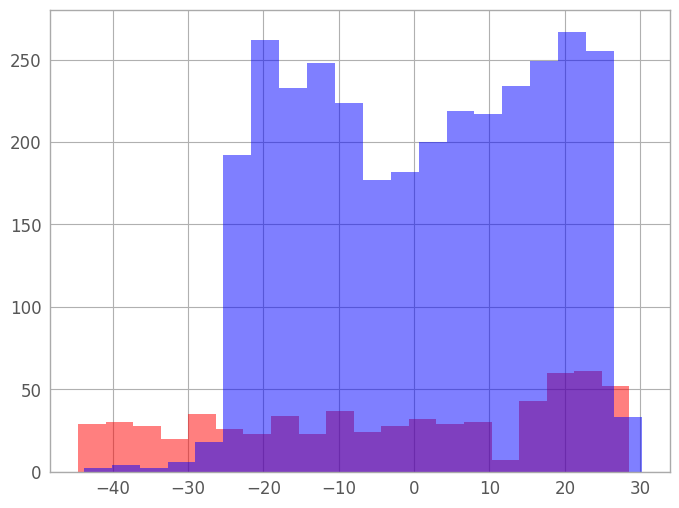

In [69]:
plt.hist(tsne_df.y.loc[short_tninety],bins=20,color="red",alpha=0.5)
plt.hist(tsne_df.y.loc[long_tninety],bins=20,color="blue",alpha=0.5)

In [70]:
tsne_df.y.loc[short_tninety].size

651

In [71]:
tsne_df.y.loc[long_tninety].size

3224

In [72]:
import pandas as pd
import ast

# Read the TSV file
redshift = pd.read_csv("/pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/batse_z.tsv", sep="\s+")

# Function to convert string lists to tuples
def parse_tuple(value):
    if isinstance(value, str) and value.startswith("[") and value.endswith("]"):
        try:
            return tuple(ast.literal_eval(value))  # Convert string list to tuple
        except (SyntaxError, ValueError):
            return value  # Return as is if parsing fails
    return value  # Return unchanged if not a list

# Apply function to all columns except the first (Trigger)
redshift.iloc[:, 1:] = redshift.iloc[:, 1:].applymap(parse_tuple)

# Ensure numeric values remain floats
redshift.iloc[:, 1:] = redshift.iloc[:, 1:].apply(pd.to_numeric, errors='ignore')

# Display processed DataFrame
redshift


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/scratch/users/w/wsisaid/ipykernel_3664061/1397562291.py:5: SyntaxWarning: invalid escape sequence '\s'
  redshift = pd.read_csv("/pbs/home/w/wsisaid/wsisaid/Projects/GRBai/GRB_AI/GRBAI/datasets/batse_z.tsv", sep="\s+")
/scratch/users/w/wsisaid/ipykernel_3664061/1397562291.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  redshift.iloc[:, 1:] = redshift.iloc[:, 1:].applymap(parse_tuple)
/scratch/users/w/wsisaid/ipykernel_3664061/1397562291.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  redshift.iloc[:, 1:] = redshift.iloc[:, 1:].apply(pd.to_numeric, errors='ignore')


,TRIGGER_NUM,µ_Z_H06,PI_50%,PI_90%,µ_Z_L08,PI_50%.1,PI_90%.1,µ_Z_B10,PI_50%.2,PI_90%.2
0,105,0.47,"(0.31, 0.59)","(0.18, 0.91)",0.45,"(0.38, 0.51)","(0.3, 0.65)",0.72,"(0.44, 0.92)","(0.24, 1.43)"
1,107,1.42,"(1.03, 1.72)","(0.71, 2.43)",2.05,"(1.76, 2.33)","(1.35, 2.78)",1.92,"(1.32, 2.37)","(0.86, 3.49)"
2,109,1.60,"(1.14, 1.92)","(0.78, 2.83)",1.88,"(1.65, 2.09)","(1.32, 2.51)",3.05,"(2.22, 3.76)","(1.4, 5.0)"
3,110,2.16,"(1.55, 2.66)","(1.02, 3.69)",3.07,"(2.71, 3.43)","(2.14, 3.96)",3.20,"(2.4, 3.89)","(1.57, 5.13)"
4,111,2.20,"(1.56, 2.71)","(1.01, 3.8)",2.90,"(2.58, 3.23)","(2.05, 3.76)",3.66,"(2.79, 4.33)","(1.82, 5.9)"
...,...,...,...,...,...,...,...,...,...,...
1361,8110,0.98,"(0.74, 1.15)","(0.48, 1.62)",1.08,"(0.95, 1.2)","(0.77, 1.43)",1.37,"(0.95, 1.68)","(0.6, 2.53)"
1362,8111,0.84,"(0.62, 1.01)","(0.39, 1.42)",0.90,"(0.79, 0.99)","(0.64, 1.19)",1.29,"(0.87, 1.59)","(0.53, 2.45)"
1363,8112,1.12,"(0.84, 1.33)","(0.55, 1.88)",1.42,"(1.24, 1.58)","(0.98, 1.88)",1.56,"(1.06, 1.93)","(0.68, 2.9)"
1364,8116,1.09,"(0.82, 1.29)","(0.54, 1.84)",1.24,"(1.09, 1.37)","(0.9, 1.64)",1.81,"(1.22, 2.25)","(0.78, 3.37)"
